## Binary Search

### Introduction
* What is binary search
  + It describes the process of searching for a specific value in an ordered collection
 * Terminology used in Binary Search
   + Target - the value that you are searching for
   + Index - the current location that you are searching
   + Left, Right - the indices from which we use to maintain our search space
   + Mid - the index that we use to apply a condition to determine if we should search left or right
* How does it work?
  + In its simplest form, Binary Search operates on a contiguous sequence with a specified left and right index, which is called the search space
  + Binary Search maintains the left, right, and middle indicies of the search space and compares the search target or applies the search condition to the middle value of the collection
  + if the condition is unsatisfied or values unequal, the half in which the target cannot lie is eliminated and the search continues on the remaining half until it is successful
  + If the search ends with an empty half, the condition cannot be fulfilled and target is not found.

#### Leetcode 704. Binary Search
* Overview 
  + Given an array of integers nums which is sorted in ascending order, and an integer target, write a function to search target in nums. If target exists, then return its index. Otherwise, return -1.
  + You must write an algorithm with O(log n) runtime complexity.
  + Constraints:
    + 1 <= nums.length <= 10^4
    + -10^4 < nums\[i\], target < 10^4
    + All the integers in nums are unique.
    + nums is sorted in ascending order.
* Algorithm
  + classic binary search without repeating elements
  + apply the classic binary search template
    + use start <= end condition in the while loop to check each element
    + in each iteration, define mid index, and check the value of nums(mid)
      + if nums(mid) == target, return mid
      + if nums(mid) > target, end = mid - 1
      + else, nums(mid) < target, start = mid + 1
    + if while loop completes, the target dosen't exist in the list, return -1  

In [ ]:
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        if not nums:
            return -1
        
        start = 0
        end = len(nums) -1
        
        while start <= end:
            mid = start + (end - start) // 2
            if nums[mid] == target:
                return mid
            elif nums[mid] > target:
                end = mid -1
            else:
                start = mid + 1
        return -1        

### Identification Binary Search
* Binary Search should be considered every time you need to search for an index or element in a collection
* If the collection is unordered, we can always sort it first before applying Binary Search
* Three parts of a successful binary search
  + Pre-processing - Sort if collection is unsorted.
  + Binary Search - Using a loop or recursion to divide search space in half after each comparison.
  + Post-processing - Determine viable candidates in the remaining space.
  
### Binary Search Template 1
* most basic and elementary form of binary search
* used to search for an element or condition which can be determined by accessing a single index in the array
  + search condition can be determined without comparing to the element's neighbors (or use specific elements around it)
* No post-processing required because at each step, you are checking to see if the element has been found. If you reach the end, then you know the element is not found 

In [1]:
# code for template 1
def binarySearch(nums, target):
    """
    :type nums: List[int]
    :type target: int
    :rtype: int
    """
    if len(nums) == 0:
        return -1

    left, right = 0, len(nums) - 1
    while left <= right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    # End Condition: left > right
    return -1

#### Leetcode 69. Sqrt(x)
* Overview
  + Given a non-negative integer x, return the square root of x rounded down to the nearest integer. The returned integer should be non-negative as well.
  + You must not use any built-in exponent function or operator.
  + For example, do not use pow(x, 0.5) in c++ or x ** 0.5 in python.
* Algorithm
  + classic binary search using template 1
  + return end index to round down the answer if no exact match is find (the square root of target is not an integer)

In [ ]:
class Solution:
    def mySqrt(self, x: int) -> int:
        if x < 2:
            return x
        
        start = 0
        end = x
        while start <= end:
            mid = start + (end-start) // 2
            if mid * mid == x:
                return mid
            elif mid * mid > x:
                end = mid -1
            else:
                start = mid + 1
        return end        

#### Leetcode 374. Guess Number Higher or Lower
* Overview
  + We are playing the Guess Game. The game is as follows:
    + I pick a number from 1 to n. You have to guess which number I picked.
    + Every time you guess wrong, I will tell you whether the number I picked is higher or lower than your guess.
    + You call a pre-defined API int guess(int num), which returns three possible results:
      + -1: Your guess is higher than the number I picked (i.e. num > pick).
      + 1: Your guess is lower than the number I picked (i.e. num < pick).
      + 0: your guess is equal to the number I picked (i.e. num == pick).
  + Return the number that I picked.
* Algorithm
  + classic binary search problem using template 1
  + if guess(mid) returns 0, mid is the answer, return mid
  + if guess(mid) == 1, start = mid + 1
  + if guess(mid) == -1, end = mid -1  

##### Leetcode 33. Search in Rotated Sorted Array
* Overview
  + There is an integer array nums sorted in ascending order (with distinct values).
  + Prior to being passed to your function, nums is possibly rotated at an unknown pivot index k (1 <= k < nums.length) such that the resulting array is \[nums\[k\], nums\[k+1\], ..., nums\[n-1\], nums\[0\], nums\[1\], ..., nums\[k-1\]\] (0-indexed). For example, \[0,1,2,4,5,6,7\] might be rotated at pivot index 3 and become \[4,5,6,7,0,1,2\].
  + Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.
  + You must write an algorithm with O(log n) runtime complexity.
* Algorithm
  + use template 1.
  + if nums(mid) == target, return mid
  + if nums(mid) > nums(end), the mid point is on the first half of rotation
    + check if the target is between nums(start) and nums(mid), if so, set end = mid -1
    + otherwise, start = mid + 1 (note that this may belong to the first rotation section, or the second section)
  + if nums(mid) < nums(end), the mid point is on the second half of rotation
    + check if the target is between nums(mid+1) and nums(end), if so set start = mid + 1
    + otherwise, end = mid -1, this could be the second rotation section, or the first section
  + out of the while loop, returns -1

In [3]:
from typing import List
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        if not nums:
            return -1
        
        start, end = 0, len(nums)-1
        
        while start <= end:
            mid = start + (end - start) // 2
            if nums[mid] == target:
                return mid
            
            # if the mid point is on the first section of the rotation
            if nums[mid] > nums[end]:
                
                # if the target is in the range of the first section, define search space to this section
                if nums[start] <= target < nums[mid]:
                    end = mid -1
                # otherwise, goes to the second half
                else:
                    start = mid + 1
            
            # if the mid point is on the second half of the rotation
            else:
                # if the target is in this section, focus on the section
                if nums[mid] < target <= nums[end]:
                    start = mid + 1
                # else goes to the first section
                else:
                    end = mid - 1
        return -1            
        

### Binary Search Template 2
* loop condition start < end, so start == end out of the loop
  + the nums(start) need to be checked, since this value is not checked in the loop
* using end == mid, so the right edge will be kept at an index with the value larger than target
* if the nums(mid) == target, return it, otherwise nums(mid) > target, and return -1
* usually, nums(mid) == target is combined with either nums(mid) < target or nums(mid) > target to find the first or last element among the duplicated elements, or in the absence of the target, the first elment bigger/smaller than the target
* the template is applicable to the two pattern problems where there are two pattens and you need to find the first or the last element of one pattern

In [ ]:
# template 2 using left < right for two pattern search problems
def binarySearch(nums, target):
    """
    :type nums: List[int]
    :type target: int
    :rtype: int
    """
    if len(nums) == 0:
        return -1

    left, right = 0, len(nums) - 1
    while left < right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid + 1
        else:
            right = mid

    # Post-processing:
    # End Condition: left == right
    if nums[left] == target:
        return left
    return -1


#### Leetcode 278. First Bad Version
* Overview
  + You are a product manager and currently leading a team to develop a new product. Unfortunately, the latest version of your product fails the quality check. Since each version is developed based on the previous version, all the versions after a bad version are also bad.
  + Suppose you have n versions \[1, 2, ..., n\] and you want to find out the first bad one, which causes all the following ones to be bad.
  + You are given an API bool isBadVersion(version) which returns whether version is bad. Implement a function to find the first bad version. You should minimize the number of calls to the API.
* Algorithm
  + apply template 2 to find the first bad version. Here there are two pattens, good versions and bad versions, and we need to find the first of the second pattern
  + this is a typical use case for template 2
    + whenever the mid version is good, we set start = mid + 1, otherwise, we set end = mid
    + out of the loop, start == end and the index corresponds to the first bad version. Note that the problem guarantees there is at least one bad version, otherwise, we need to check if the converged index corresponds to a bad version

In [4]:
# The isBadVersion API is already defined for you.
# def isBadVersion(version: int) -> bool:

class Solution:
    def firstBadVersion(self, n: int) -> int:
        start, end = 1, n
        
        while start < end:
            mid = start + (end - start) // 2
            if isBadVersion(mid):
                end = mid
            else:
                start = mid + 1
        return start                        

#### 162. Find Peak Element
* Overview
  + A peak element is an element that is strictly greater than its neighbors.
  + Given a 0-indexed integer array nums, find a peak element, and return its index. If the array contains multiple peaks, return the index to any of the peaks.
  + You may imagine that nums\[-1\] = nums\[n\] = -∞. In other words, an element is always considered to be strictly greater than a neighbor that is outside the array.
  + You must write an algorithm that runs in O(log n) time.
* Algorithm
  + since the two sides of the array are negative infinite, there must be at least one peak
  + if nums only contains one element, return index 0
  + if nums has two elements, returns 0 if nums(0) > nums(1) otherwise 1
  + if nums(0) > nums(1) returns 0. If nums(n-1) > nums(n-2) returns n-1
  + if we image the two sides of the peak. The left side is ascending part and the right side is a descending side. Therefore, we can either find the first descending element, or the last ascending element 
  + this converts the problem to a two-pattern problem. the first descending element is easier since we don't need to consider the infitine loop 
  + to speed up the algorithm, we add the condition that if the mid is a peak, immediately returns the mid index

In [ ]:
# implement the first descending element
from typing import List
class Solution:
    def findPeakElement(self, nums: List[int]) -> int:
        if len(nums) == 1:
            return 0
        if len(nums) == 2:
            return 0 if nums[0] > nums[1] else 1
        if nums[0] > nums[1]:
            return 0
        n = len(nums)
        if nums[n-1] > nums[n-2]:
            return n-1
        
        start, end = 0, n - 1
        while start < end:
            mid = start + (end - start) // 2
            
            # return mid if mid is a peak to speed up the algorithm
            if nums[mid-1] < nums[mid] and nums[mid] > nums[mid+1]:
                return mid
            
            # return the first descending element
            elif nums[mid] > nums[mid+1]:
                end = mid
            else:
                start = mid + 1
                
        return start        

In [5]:
# implement the last ascending element
from typing import List
class Solution:
    def findPeakElement(self, nums: List[int]) -> int:
        if len(nums) == 1:
            return 0
        if len(nums) == 2:
            return 0 if nums[0] > nums[1] else 1
        if nums[0] > nums[1]:
            return 0
        n = len(nums)
        if nums[n-1] > nums[n-2]:
            return n-1
        
        start, end = 0, n - 1
        while start < end:
            mid = start + (end - start) // 2
            
            # return mid if mid is a peak to speed up the algorithm
            if nums[mid-1] < nums[mid] and nums[mid] > nums[mid+1]:
                return mid
            
            # return the first descending element
            elif nums[mid] > nums[mid+1]:
                end = mid
            else:
                start = mid + 1
                
        return start        

#### Leetcode 153. Find Minimum in Rotated Sorted Array
* Overview
  + Suppose an array of length n sorted in ascending order is rotated between 1 and n times. For example, the array nums = \[0,1,2,4,5,6,7\] might become:

    + \[4,5,6,7,0,1,2\] if it was rotated 4 times.
    + \[0,1,2,4,5,6,7\] if it was rotated 7 times.
  + Notice that rotating an array \[a\[0\], a\[1\], a\[2\], ..., a\[n-1\]\] 1 time results in the array \[a\[n-1\], a\[0\], a\[1\], a\[2\], ..., a\[n-2\]\].
  + Given the sorted rotated array nums of unique elements, return the minimum element of this array.
  + You must write an algorithm that runs in O(log n) time.
  
* Algorithm
  + a sorted list is rotated to two parts (or still one part) with two possible patterns
  + we need to find the first element of the pattern where the original starting point is included
  +  if nums(mid)>num(end), that means the current mid point is on the first part and the end point is on the second part. In addition, the minimum must be on the starting position of the second part, so we increase start to be mid+1
  + the condition to check if we are on the desired pattern is if the current value is smaller than the end element of the search space   
    + at the begining, the mid element is compared to the end index element of the list, if it is bigger than the end element, the end element will stay, and the mid index is drawn towards the end element, so we can make sure the mid index will finally move to the second rotation section
    + during the iteration, if some mid point is moved to the first section, since its value will be bigger than the end index element, it will be drawn back to the second section
    + out of the loop, start and end converge

In [ ]:
# find the first element of the ascending pattern containing original staring point

from typing import List
class Solution:
    def findMin(self, nums: List[int]) -> int:
        if len(nums) == 1:
            return nums[0]
        
        start, end = 0, len(nums) - 1
        
        while start < end:
            mid = start + (end - start) // 2
            
            # if mid is in the first rotation section, search space should be focused on the 2nd section
            if nums[mid] > nums[end]:
                start = mid + 1
            
            # if mid is already on the 2nd half (or the ascending section including the original start)
            # find the first element of the pattern
            else:
                end = mid
                
        return nums[start]        

### Binary Search Template 3
* loop condition is left + 1 < right, so the search space is at least 3 in size at each step
* applies to more complicated patterns
* post-processing required. The loop ends when left = right -1, so both nums(left) and nums(right) need to be checked after the loop 

In [6]:
# template 3, using left + 1 < right

def binarySearch(nums, target):
    """
    :type nums: List[int]
    :type target: int
    :rtype: int
    """
    if len(nums) == 0:
        return -1

    left, right = 0, len(nums) - 1
    while left + 1 < right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid
        else:
            right = mid

    # Post-processing:
    # End Condition: left + 1 == right
    if nums[left] == target: return left
    if nums[right] == target: return right
    return -1

#### Leetcode 34. Find First and Last Position of Element in Sorted Array
* Overview
  + Given an array of integers nums sorted in non-decreasing order, find the starting and ending position of a given target value.
  + If target is not found in the array, return \[-1, -1\].
  + You must write an algorithm with O(log n) runtime complexity.
* Algorithm
  + we can write two binary search functions using template 2, one for the first, and the second for the last index of the target value, and combine them.
    + we can run the function to find the first element index, if it returns -1, then directly returns \[-1, -1\]
  + another trick we can make is to use template 1 and find the target - 0.5, and target + 0.5 as left and right, reapectively. we return the start indices of the two binary search runs, and return left, and right -1. 
  + If the element doesn't exist in the array, we return (-1, -1)

In [7]:
# implementation by runiing template 1 twice
class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        if not nums:
            return [-1, -1]        
       
        
        def binary_search(target: int) -> int:
            start, end = 0, len(nums) - 1
            
            while start <= end:
                mid = start + (end - start) // 2                
                if nums[mid] > target:
                    end = mid - 1
                else:
                    start = mid + 1
            return start
        
       
        # left index is the index of the first target element, if exists
        left = binary_search(target - 0.5)
        
        # right index is the index of the last target element -1, if exists
        right = binary_search(target + 0.5)
        
        # if target doesn't exist, left == right
        if left == right:
            return [-1, -1]
        
        # return the range
        return [left, right-1]
        

#### Leetcode 658. Find K Closest Elements
* Overview
  + Given a sorted integer array arr, two integers k and x, return the k closest integers to x in the array. The result should also be sorted in ascending order.
  + An integer a is closer to x than an integer b if:
    + |a - x| < |b - x|, or
    + |a - x| == |b - x| and a < b
* Algorithm
  + note that when the left edge and righ edge have equal distances from target value, we prefer the left edge
  + binary search
    + the problem can be considered as having two patterns
      + pattern 1 is what we are looking for. It consists of k continuous elements and within this region, the difference between each element and target value x is smaller than any element outside of the region
      + pattern 2 covers the remaining regions of the array, with difference between any element in the region being larger than the difference between elements in pattern 1
      + note that since the array is sorted, patten 1 must covers a continuous subarray from the original array
   + sliding window
     + first process the edge cases of arr(0) >= x or len(arr) == k or arr(-1) < x to make sure the arr contains some elements smaller and some bigger than x
     + define a binary search function to return the last index of element smaller than x as left
     + define right = left + 1
     + note that neither of left and right indices will be included in the final k elements
     + while right - left - 1 < k, expand the slide window
       + if left == -1, we can only expand to the right side, so return arr(:k)
       + if right == n or abs(arr(left) - x) <= abs(arr(right) - x), left -= 1, expand left side
       + else, right += 1 to expand right side
     + return arr(left+1:right)  

In [9]:
# binary search implementation

from typing import List
class Solution:
    def findClosestElements(self, arr: List[int], k: int, x: int) -> List[int]:
        n = len(arr)
        
        if n == k or arr[0] >= x:
            return arr[:k]
        if arr[-1] <= x:
            return arr[-k:]
        
        # search left as the index of the first element of the k closest elements to x
        # the search space of this index is in region of [0, n-k], since we need at least k elements 
        # starting from this index
        start, end = 0, len(arr) - k
        
        while start < end:
            mid = start + (end - start) // 2
            if abs(arr[mid]-x) <= abs(arr[mid+k] - x):
                end = mid
            else:
                start = mid + 1
        return arr[start:start+k]        
        

In [10]:
# slide window implementation
class Solution:
    def findClosestElements(self, arr: List[int], k: int, x: int) -> List[int]:
        n = len(arr)
        
        if n == k or arr[0] >= x:
            return arr[:k]
        if arr[-1] <= x:
            return arr[-k:]
        
        # define binary search algorithm to find the last element index smaller than x
        # note that if all element are bigger than x, we have processed that edge case
        
        def binary_search() -> int:
            start, end = 0, len(arr) - 1
            
            while start < end:
                mid = start + (end - start + 1) // 2
                if arr[mid] >= x:
                    end = mid - 1
                else:
                    start = mid
                    
            return start
        
        left = binary_search()
        right = left + 1
        
        while right - left - 1 < k:
            if left == -1:
                return arr[:k]
                
            if right == len(arr) or abs(arr[left] - x) <= abs(arr[right] - x):
                left -= 1
                
            else:
                right += 1
                
        return arr[left+1:right]             

### Leetcode problem practice

#### 270. Closest Binary Search Tree Value
* Overview
  + Given the root of a binary search tree and a target value, return the value in the BST that is closest to the target. If there are multiple answers, print the smallest.
* Algorithm
  + take advantage of the BST tree property: 
    + if target is smaller than node value, go to left child (if exists). 
    + If target is bigger than node value, go to right child (if exist). 
    + Otherwise return node value. 
    + The key point how to handle when target is between the current node and its left or right children. 
      + the idea is that each child send back the value closest to the target to its parent node,and each node only needs to find the closet value from its descendent and compare it to itself, then sends the closet value to its parent node.

In [13]:
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class Solution:
    def closestValue(self, root: Optional[TreeNode], target: float) -> int:
                
        rs = root.val
        
        if target < root.val and root.left:
            tmp = self.closestValue(root.left, target)
            
            # use <= since we prefer smaller value when two values 
            # have equal difference to target
            if abs(tmp-target) <= abs(rs-target):
                rs = tmp
                
        elif target > root.val and root.right:
            tmp = self.closestValue(root.right, target)
            if abs(tmp-target) < abs(rs-target):
                rs = tmp
                
        return rs        

#### Leetcode 702. Search in a Sorted Array of Unknown Size
* Overview 
  + This is an interactive problem.
  + You have a sorted array of unique elements and an unknown size. You do not have an access to the array but you can use the ArrayReader interface to access it. You can call ArrayReader.get(i) that:
    + returns the value at the ith index (0-indexed) of the secret array (i.e., secret[i]), or
    + returns 231 - 1 if the i is out of the boundary of the array.
  + You are also given an integer target.
  + Return the index k of the hidden array where secret[k] == target or return -1 otherwise.
  + You must write an algorithm with O(log n) runtime complexity.
* Algorithm  
  + first step is find the right boundary of the array to find target
    + starting from right = 1 and increase by 10 times while reader(right) < target
    + if reader(right) == target, return right
    + we don't need to worry about that right is out of boundary, since target <= 10000, which is far < 2^31 - 1
  + the second step is to find the index of target by using template 1 
* time complexity
  + O(logN) where N = target
* space complexity
  + O(1)

In [14]:
class Solution:
    def search(self, reader: 'ArrayReader', target: int) -> int:
        
        right = 1
        while reader.get(right) < target:
            right *= 10
            
        if reader.get(right) == target:
            return right
        
        start = 0
        while start <= right:
            mid = start + (right - start) // 2
            if reader.get(mid) == target:
                return mid
            elif reader.get(mid) > target:
                right = mid - 1
            else:
                start = mid + 1
        return -1        

#### Leetcode 50. Pow(x, n)
* Overview
  + Implement pow(x, n), which calculates x raised to the power n (i.e., xn).
* Algorithm
  + first, process the edge case of n < 0, n == 0 and n == 1
  + then using binary method to calculate sqrt = pow(x, n//2)
    + if n % 2 == 0, return sqrt * sqrt
    + otherwise, return sqrt * sqrt * x
* time complexity
  + O(logN)
* space complexity
  + O(logN) by recursive implementation

In [ ]:
class Solution:
    def myPow(self, x: float, n: int) -> float:
        
        # process the edge case of n < 0, n == 0 and n == 1
        if n < 0:
            x = 1 / x
            n = -n
        elif n == 0:
            return 1
        elif n == 1:
            return x
        
        sqrt = self.myPow(x, n//2)
        
        if n % 2 == 0:
            return sqrt * sqrt
        else:
            return sqrt * sqrt * x
        

#### Leetcode 367. Valid Perfect Square
* Overview
  + Given a positive integer num, return true if num is a perfect square or false otherwise.
  + A perfect square is an integer that is the square of an integer. In other words, it is the product of some integer with itself.
  + You must not use any built-in library function, such as sqrt.
* Algorithm (Binary search)
  + if num < 2, return True (num == 1)
  + set start and end at 1 and num - 1, respectively
  + apply template 1 to check every mid value. If mid * mid == num, return True
  + return False out of the while loop  

In [15]:
class Solution:
    def isPerfectSquare(self, num: int) -> bool:
        if num < 2:
            return True
        
        start, end = 1, num -1
        
        while start <= end:
            mid = start + (end - start) // 2
            if mid * mid == num:
                return True
            elif mid * mid > num:
                end = mid - 1
            else:
                start = mid + 1
        return False         
        

#### Leetcode 744. Find Smallest Letter Greater Than Target
* Overview
  + You are given an array of characters letters that is sorted in non-decreasing order, and a character target. There are at least two different characters in letters.
  + Return the smallest character in letters that is lexicographically greater than target. If such a character does not exist, return the first character in letters.
* Algorithm
  + first process the edge cases
    + if target < letters(0), return letters(0)
    + if target > letters(-1), return letters(0)
  + apply template 2 where pattern 1: mid > target and pattern 2: mid <= target and we want to find the first element index of pattern 1
* time complexity
  + O(logN)
* space complexty
  + O(1)

In [16]:
class Solution:
    def nextGreatestLetter(self, letters: List[str], target: str) -> str:
        if letters[0] > target or letters[-1] <= target:
            return letters[0]
        
        start, end = 0, len(letters) - 1
        
        # find the first letter > target
        while start < end:
            mid = start + (end - start) // 2
            if letters[mid] <= target:
                start = mid + 1
            else:
                end = mid
        return letters[start]                

#### Leetcode 154. Find Minimum in Rotated Sorted Array II
* Overview
  + Suppose an array of length n sorted in ascending order is rotated between 1 and n times. For example, the array nums = \[0,1,4,4,5,6,7\] might become:
    + \[4,5,6,7,0,1,4\] if it was rotated 4 times.
    + \[0,1,4,4,5,6,7\] if it was rotated 7 times.
  + Notice that rotating an array \[a\[0\], a\[1\], a\[2\], ..., a\[n-1\]]\ 1 time results in the array \[a\[n-1\], a\[0\], a\[1\], a\[2\], ..., a\[n-2\]\].
  + Given the sorted rotated array nums that may contain duplicates, return the minimum element of this array.
  + You must decrease the overall operation steps as much as possible.
* Algorithm
  + use template 2. The same principle applies: find the first element of the pattern where the mid is <= end
  + since duplication is possible, we need to consider
    1. nums(mid) == nums(start) == nums(end)
      + start += 1 and end -= 1
    2. nums(mid) <= nums(end)
      + since case 1 has been excluded, then if nums(mid) == nums(end), then mid must be on the second rotation section. This is because if mid is on the first section, then nums(mid) > nums(start) and nums(start) <= nums(end), so nums(mid) must be greater then nums(end)
    3. nums(mid) > nums(end)
      + mid is on the first rotation section
* Time complexity
  + O(logN)
* space complexity
  + O(1)

In [ ]:
class Solution:
    def findMin(self, nums: List[int]) -> int:
        if len(nums) == 1:
            return nums[0]
        
        start, end = 0, len(nums) - 1
        
        while start < end:
            mid = start + (end - start) // 2
            if nums[mid] == nums[start] == nums[end]:
                start += 1
                end -= 1
                
            # if nums[mid] < or == nums[end]. mid is on the second rotation part 
            # if mid is on the first part, it must be > nums[start], which >= nums[end]
            elif nums[mid] <= nums[end]:
                end = mid
            else:
                start = mid + 1
        return nums[start]        
            

#### Leetcode 349. Intersection of Two Arrays
* Overview
  + Given two integer arrays nums1 and nums2, return an array of their intersection. Each element in the result must be unique and you may return the result in any order.
* Algorithm
  + binary search
    + sort the two arrays
    + traverse the shorter array for each element, if its index > 0 and nums(i) == nums(i-1), continue, otherwise, find if nums(i) is in long list by binary search, if so, add it to the results
    + time complexity
      + O(NlogN) to sort the arrays and O(NlogN) to search elements from the long list
  + two pointers
    + sort both lists
    + while i < len(l1) and j < len(l2), 
      + if nums1(i) == nums2(j), add nums1(i) to result, increment both i and j, and check the duplications to increment i and j
      + if nums1(i) > nums2(j), increment j
      + if nums1(i) < nums2(j), increment i

In [ ]:
# two pointers
class Solution:
    def intersection(self, nums1: List[int], nums2: List[int]) -> List[int]:
        nums1.sort()
        nums2.sort()
        
        if nums1[0] > nums2[-1] or nums1[-1] < nums2[0]:
            return []
        
        i, j = 0, 0
        rs = []
        while i < len(nums1) and j < len(nums2):
            if nums1[i] == nums2[j]:
                rs.append(nums1[i])
                i += 1
                j += 1
                
                while i < len(nums1) and nums1[i] == nums1[i-1]:
                    i += 1
                while j < len(nums2) and nums2[j] == nums2[j-1]:
                    j += 1
            elif nums1[i] > nums2[j]:
                j += 1
            else:
                i += 1
        return rs        

In [ ]:
# binary search implementation
class Solution:
    def intersection(self, nums1: List[int], nums2: List[int]) -> List[int]:
        nums1.sort()
        nums2.sort()
        
        if nums1[0] > nums2[-1] or nums1[-1] < nums2[0]:
            return []
        
        # set nums1 as the longer list
        if len(nums1) < len(nums2):
            nums1, nums2 = nums2, nums1
            
        def binary_search(target: int) -> bool:
            start, end = 0, len(nums1) -1
            while start <= end:
                mid = start + (end - start) // 2
                if nums1[mid] == target:
                    return True
                elif nums1[mid] > target:
                    end = mid -1
                else:
                    start = mid + 1
            return False
        
        rs = []
        for i, num in enumerate(nums2):
            if i > 0 and nums2[i] == nums2[i-1]:
                continue
            if binary_search(nums2[i]):
                rs.append(nums2[i])
                
        return rs                     

#### Leetcode 350. Intersection of Two Arrays II
* Overview
  + Given two integer arrays nums1 and nums2, return an array of their intersection. Each element in the result must appear as many times as it shows in both arrays and you may return the result in any order.
* Algorithm
  + two pointers
    + sort nums1 and nums2
    + initialize two pointers i, and j to be zero
    + while i < len(nums1) and j < len(nums2) 
      + if nums1(i) == nums2(j), add nums1(i) to rs list, and i += 1, j+= 1
      + elif nums1(i) > nums2(j), j+= 1
      + elif nums1(i) < nums2(j), i+= 1
    + return rs
    + time complexity
      + O(NlogN) for sorting and O(N) for two pointers
  + binary search
    + sort both lists
    + find the first element index of target from nums1 with specified staring index
    + if target doesn't exist, returns -1, otherwise returns the first element index
    + if the returned index > -1
      + add nums1(index) to results
      + update the staring index to be index + 1 for the next search
    + return rs

In [17]:
# two pointers implementation

from typing import List
class Solution:
    def intersect(self, nums1: List[int], nums2: List[int]) -> List[int]:
        nums1.sort()
        nums2.sort()
        
        i, j = 0, 0
        rs = []
        
        while i < len(nums1) and j < len(nums2):
            if nums1[i] == nums2[j]:
                rs.append(nums1[i])
                i += 1
                j += 1
            elif nums1[i] > nums2[j]:
                j += 1
            else:
                i += 1
                
        return rs       
        

In [ ]:
# binary search implementation
class Solution:
    def intersect(self, nums1: List[int], nums2: List[int]) -> List[int]:
        nums1.sort()
        nums2.sort()
        
        if len(nums1) < len(nums2):
            nums1, nums2 = nums2, nums1
        if nums1[0] > nums2[-1] or nums2[0] > nums1[-1]:
            return []
            
        def binary_search(start: int, target:int) -> int:
            if start >= len(nums1):
                return -1
            end = len(nums1) -1
            while start < end:
                mid = start + (end - start) // 2
                if nums1[mid] >= target:
                    end = mid
                else:
                    start = mid + 1
            return start if nums1[start] == target else -1
        
        start, j = 0, 0
        rs = []
        
        for j in range(len(nums2)):
            target = nums2[j]
            if target > nums1[-1]:
                return rs
            index = binary_search(start, target)
            if index > -1:
                rs.append(target)
                start = index +1
            
                
        return rs       
        

#### Leetcode 167. Two Sum II - Input Array Is Sorted
* Overview
  + Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number. Let these two numbers be numbers\[index1\] and numbers\[index2\] where 1 <= index1 < index2 <= numbers.length.
  + Return the indices of the two numbers, index1 and index2, added by one as an integer array \[index1, index2\] of length 2.
  + The tests are generated such that there is exactly one solution. You may not use the same element twice.
  + Your solution must use only constant extra space.
* Algorithm
  + two pointers 
    + set i, j as the start and end index to be initialzied to 0 and n-1, respectively
    + for each i, j combination, calculate total = nums(i) + nums(j)
    + if total == target, return (i+1, j+1)
    + if total > target, j -= 1
    + if total < target, i += 1
  + time complexity
    + O(n)
  + space complexity
    + O(1)

In [19]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        
        n = len(numbers)
        i, j = 0, n-1
        
        while i < j:
            total = numbers[i] + numbers[j]
            if total == target:
                return [i+1, j+1]
            elif total > target:
                j -= 1
            else:
                i += 1

#### Leetcode 287. Find the Duplicate Number
* Overview
  + Given an array of integers nums containing n + 1 integers where each integer is in the range \[1, n\] inclusive.
  + There is only one repeated number in nums, return this repeated number.
  + You must solve the problem without modifying the array nums and uses only constant extra space.
* Algorithm
  + the general idea is to compare the properites of the nums with the idea array where only elements in \[1, n\] are included. These properties include:
    + the number of 1s in different bit positions from bit 0 (right most) to bit 31
    + the count of elements <= the current element. In idea list, this count should always equals to the value of the current element (there should be 1 element <= 1, 2 counts <= 2, etc.) we need to find the first element index that having counts > then its value
    + for repeated elements, if we draw the flowchart of element's value traversed by the index of elements, there will be a cycle, as shown below. Note that entry point of the cycle is defined by the value of element
    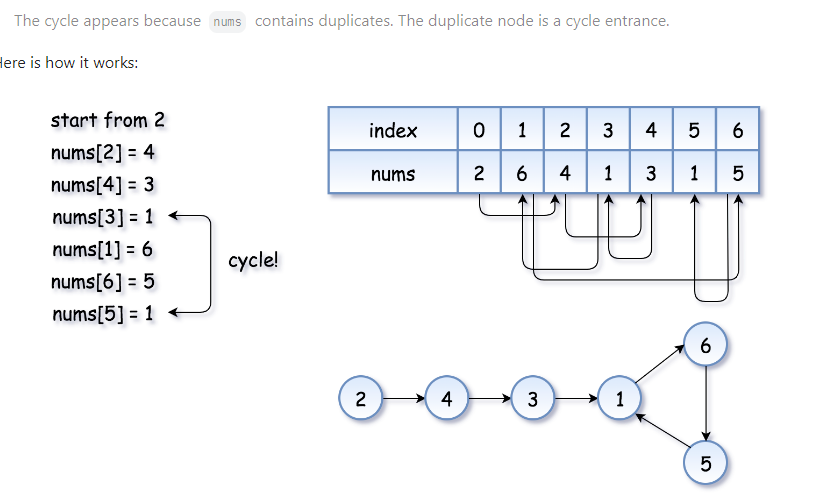
  + based on the three properties, there are three algorithms
    + bit by bit
      + scan bit position from 0 to 31 as b, 
        + we right shift each element by the bit position, and count the sum of 1s for each bit position and assign it as a (actual)
        + we right shift each number from 1 to n as in the idea list, and count the sum of 1s for each bit position, and assign it as e (expected)
      + if e > a, we add rs |= 1 << b (we don't care the exact difference between e and a, we only care if there is a 1 at the b position)
    return rs  
    + binary search
      + for numbers in the range of 1 and n, if repeated number happens at i, then all the count of elements <= i will be bigger its value
        + we don't care numbers where count <= value, since we only care the repeated number. when count< value, some numbers <= the current values are missing, which is not what the question is asking
      + we need to find the first element index of the pattern where the count > its value
    + two points
      + same as the cyclic linked list detection problem. We set fast and slow pointers. Fast pointer goes two steps and slow pointer goes one step each time
      + we fisrt find the point where both pointers point to the same element, then initialize the fast pointer to the head of the list, and find the position where both pointers overlap again, which is the answer

In [21]:
# bit by bit implementation
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        n = len(nums)
        
        rs = 0
        # scan bit positions from 0 to 31 for list and idea list
        for b in range(32):
            a, e = 0, 0
            
            # at each bit position, count the number of 1s for the list
            # and the number of 1s for idea list
            for i, num in enumerate(nums):
                if (num >> b) & 1 == 1:
                    a += 1
                if i > 0 and ((i>> b) &1 == 1):
                    e += 1
            # if actual list has more 1s than expected list, the repeated number must have 1 
            # at that bit position
            # when combining all these bit positions, we get the repeated number
            if a > e:
                rs |= (1 << b)
                
        return rs        
                    

In [ ]:
# binary search implementation
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        n = len(nums)
        
        start, end = 1, n-1
        
        # search space is between start and end (initialized in [1, n-1])
        while start < end:
            mid = start + (end - start) // 2
            
            # find out how many elements in the list <= the current element
            count = 0
            for num in nums:
                if num <= mid:
                    count += 1
            # if count <= mid, mid is either normal as in the idea list, or
            # some element(s) <= mid are missing, and the repeated element must be > mid
            # Therefore, we will set the search space after mid
            if count <= mid:
                start = mid + 1
            
            # if count > mid, we know the repeated element occurs at or 
            # later than mid, and we need to find 
            # the first mid that satisfying the condition of count > mid
            else:
                end = mid
        return start        

In [22]:
# implement by two pointers
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        n = len(nums)
        
        # set up fast and slow pointers
        fast = nums[nums[0]]
        slow = nums[0]
        
        # find the position for both pointers overlap
        while fast != slow:
            fast = nums[nums[fast]]
            slow = nums[slow]
            
        # reset fast point to the head of the list, and get the entry point of the cycle
        fast = 0
        while fast != slow:
            fast = nums[fast]
            slow = nums[slow]
            
        return slow    
            
            

#### Leetcode 4. Median of Two Sorted Arrays
* Overview
   + Given two sorted arrays nums1 and nums2 of size m and n respectively, return the median of the two sorted arrays.
  + The overall run time complexity should be O(log (m+n))
* Algorithm (binary search)
  + set left1 and left2 as the number of elements from nums1 and nums2 to form the left part of the list containing all the elements from nums1 and nums2 after sorting
  + we know that
    + left1 + left2 = median, here we define median = (n1 + n2 + 1) // 2. Therefore, if n1 + n2 is an odd number, the left part of the list defined by left1 + left2 will have one more elements than the right part.
    + the last index of the element from nums1 and nums2 forming the left part of the new sorted list will be left1 - 1 and left2 - 1, respectively. Note that left1 and left2 are the numbers of elements from nums1 and nums2, and their indices will be left1-1 and left2-1, respectively
    + the condition we use is if nums1(left1) < nums2(left2-1), start=left1+1, otherwise, end = left1. This is to find the left most left1 such that nums1(left1)>=nums2(left2-1)
      + you can image this is the most challenging condition to fulfill the condition that nums1(left1) >= nums2(left2-1). It is very easy to select a large left1 with big left1-1 index that can easily fulfill the condition nums1(left) > nums2(left2-1) since the bigger left1, the smaller left2, but would be difficult to fullfill nums2(left2) > nums1(left1-1)
      + when we push the left1 to a value as small as possible that fullfill the condition nums1(left1) > nums2(left2-1), it can ensure that nums2(left2) > nums1(left1-1) since the left1 and left2 are using the minimum and maximum possible values, respecitively that can fullfill the condition of nums2(left2) > nums1(left1-1)
   + after the loop, set left1 = start, and left2 = median - left1
     + if left1 > 0, meaning the nums1 is cut, l1 = nums(left1-1), otherwise nums1 is not cut, l1 = float("-inf"), no left cut for nums1
     + if left1 < n, meaning that nums1 is cut, r1 = nums(left1), note that if left1 == 0, since nums1 is not cut, nums1(0) will be the first element of the right part contrbited from nums1
     + the same principle to nums2
  + if (n1+n2) %2 == 0, get the max of l1 and l2, and min of r1 and r2 and find the mean of them
    + l1 and l2 are the last elements of the left parts of nums1 and nums2 after cut
    + r1 and e2 are the first elements of the right parts of nums1 and nums2 after cut
  + if (n1+n2) % 2 == 1, since we the extra element is in the left part, we just return the max of l1 and l2   

In [ ]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        if len(nums1) > len(nums2):
            nums1, nums2 = nums2, nums1
            
        n1, n2 = len(nums1), len(nums2)       
        
        if n1 == 0:
            return (nums2[n2//2 - 1] + nums2[n2//2])/2 if n2 % 2 == 0 else nums2[n2//2]
        
        n = n1 + n2
        # make sure the left part has one more element with n is an odd number
        median = (n+1)//2
        
        # find left1 by binary search in nums1
        # left1 is the number of elements in the left part of nums1
        # left2 is the number of elements in the left part of nums2
        # left1 + left2 = meidan
        
        # start and end defines the search space for left1 within nums1
        # note that left1 is the number of elements from nums1, not the index
        start, end = 0, n1
        left1, left2 = 0, 0
        while start < end:
            left1 = start + (end - start) // 2
            left2 = median - left1
            
            # if the right part of nums1 is smaller than the max element in the left part of nums2,
            # we need to increase the left1 to move the cutting point to the right
            if nums1[left1] < nums2[left2-1]:
                start = left1 + 1
            # otherwise, we find the first left1 that fullfill the condition of nums1[left1] >= nums2[left2-1]
            else:
                end = left1
                
        left1, left2 = start, median - start
        
        l1 = nums1[left1-1] if left1 > 0 else float("-inf")
        r1 = nums1[left1] if left1 < n1 else float("inf")
        
        l2 = nums2[left2-1] if left2 > 0 else float("-inf")
        r2 = nums2[left2] if left2 < n2 else float("inf")
        
        if n % 2 == 0:
            return (max(l1, l2) + min(r1, r2)) / 2
        return max(l1, l2)
                

#### Leetcode 719. Find K-th Smallest Pair Distance
* Overview
  + The distance of a pair of integers a and b is defined as the absolute difference between a and b.
  + Given an integer array nums and an integer k, return the kth smallest distance among all the pairs nums[i] and nums[j] where 0 <= i < j < nums.length.
* Algorithm (binary search)
  + sort the nums so that we have the distances sorted
  + the search space is between 0 and the max difference in distance, which is nums\[-1\]-nums\[0\]
  + the problem is the find the smallest difference from the search space \[0, max_diff\] such that the number of pairs <= this difference = k
  + set start and end as 0 and max_diff
  + mid = start + (end - start) //2
  + count the number of pairs having difference <= mid
    + define j = 0 and traverse i from 0 to n-2, where i is the index of the starting point for difference calculation, and j is the end point
    + while j< n and nums(j) - nums(i) <= mid, j += 1
      + here we increment j if nums(j) - nums(i) to find out the max index of j that having difference <= mid
    + out of while loop, we calculate the number of pairs fullfill the condition of differenc <= mid by j-i-1 for the specified i, and count += j-i-1
    + note that for a specific i, we increment the j value until nums(j) - nums(i) > mid, so the number of the combinations between i and j, not including i and j is j -i -1
  + for a specified distance mid, count refers to how many pairs of points have distance <= mid, we just need to find the first element index that fullfills condition of count >= k, so if count >=k, we set end = mid, otherwise, start = mid + 1
  + return start out of while loop


In [ ]:
class Solution:
    def smallestDistancePair(self, nums: List[int], k: int) -> int:
        
        nums.sort()
        
        start = 0
        end = nums[-1] - nums[0]
        n = len(nums)
        
        while start < end:
            mid = start + (end - start) // 2
            j = 0
            count = 0
            
            # starting point to calculate difference
            # the entire loop is O(N)
            for i in range(n-1):
                # get the max of j as the end point having nums[j]-nums[i] <= mid
                # j only tranverse n times
                # j will only increase with increase of i
                while j < n and nums[j] - nums[i] <= mid:
                    j += 1
                count += j-i-1 # note j breadk the while loop condition, so exclude both i and j from count  
                
            if count >= k:
                end = mid
            else:
                start = mid + 1
        return start        

#### Leetcode 410. Split Array Largest Sum
* Overview
  + Given an integer array nums and an integer k, split nums into k non-empty subarrays such that the largest sum of any subarray is minimized.
  + Return the minimized largest sum of the split.
  + A subarray is a contiguous part of the array.
* Algorithm
  + binary search + greedy
    + use greedy algorithm to calculate how many blocks will be needed to fill out all the numbers to blocks with the specified max capacity of the block
    + in binary search, set the search space for block capacity between \[max number, sum of list\]
      + this covers all the possible values of the block capacity
    + if blocks > m, we will need to increase the capacity to decrease the block numbers
    + if blocks < m, we will need to decrase the capacity to increase the block numbers
    + if blocks == m, we still need to check if there exist smaller capacity to accomodate blocks == m, but we still need to main the current mid within the search space, thus, end = mid
      + if when we decrease the capacity, the blocks > m, we just increase the start part of the search space, but still include the mid in the search space and won't lose it. But if the decreased capacity also gets blocks == m, we get a smaller answer
  + dp
    + first calculate the cumsum as the sum that includes itself and all previous elements
    + state variables: ending index, number of blocks and value is the minimized largest sum of the split
    + the base case: 
      + if num\_blocks == 1, return nums\[end\_index\], basically, you only have the option to return the list including the ending index as one block
      + if end\_idx + 1 < num of blocks, (note that end\_index + 1 is the number of blocks available), we return a big number that will fail the minization process to consider this situation, here we return nums\[n-1\], which is the sum of the list
    + recurrance
      + first initialize rs as the max possible value, which is num(n-1)
      + traverse the possible end index, k, that will separate the current sublist ending at ending index to two parts, one is the sublist ending at k inclusive that will be further split to m -1 blocks, and the second part (ending part) from k+1 to ending index. These two parts split the list into m blocks
        + the ending sum is the sum of the last block, which is nums(end_idex) -nums(k)
        + rs is the min(rs, max(ending_sum, getSize(k, numblocks-1))). Here when traversing k from end_idex -1 to 0, we have multiple options, and we only returns the resutls corresponding to the minimum of the biggest chunk size
        + one track is that during the iteration, when ending_sum >=rs, we just skip out of the for loop. Since ending_sum itself is already > the previous k's rs, continuing the iteration won't generate smaller results
    
 

In [ ]:
class Solution:
    def splitArray(self, nums: List[int], m: int) -> int:
        
        if not nums:
            return 0
        
        def getBlocks(block_size: int) -> int:
            num_block = 1
            block_sum = 0
            
            for num in nums:
                if block_sum + num <= block_size:
                    block_sum += num
                else:
                    num_block += 1
                    block_sum = num
            
            return num_block    
        
        start = max(nums)
        end = sum(nums)
        
        while start < end:
            mid = start + (end-start)//2
            blocks = getBlocks(mid)
            
            # if there are too few blocks, we need to decrease the capacity of each block
            # to increase the block numbers. If it equals to m, we still need to check if 
            # there is smaller options
            if blocks <= m:
                end = mid 
            else:
                start = mid + 1
        return start        
                
                

In [ ]:
class Solution:
    def splitArray(self, nums: List[int], m: int) -> int:
        if not nums:
            return 0
        
        n = len(nums)
        
        # get cumsum that includes itself and all the previous elements
        for i in range(1, n):
            nums[i] += nums[i-1]
            
        @lru_cache(None)
        def getSize(end_idx: int, num_blocks:int) -> int:
            if num_blocks == 1:
                return nums[end_idx]
            
            if end_idx +1 < num_blocks:
                return nums[n-1]
            
            rs = nums[n-1]
            for k in range(end_idx-1, -1, -1):
                ending_sum = nums[end_idx] - nums[k]
                rs = min(rs, max(ending_sum, getSize(k, num_blocks-1)))
                if ending_sum >= rs:
                    break
            return rs
        
        return getSize(n-1, m)
            
            